In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=81741b5d24482395ad5673735e0a0394a79b7a212a316d9a865fb5d8bc21259e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/phiusiil/PhiUSIIL_Phishing_URL_Dataset.csv")

df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.columns


Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [ ]:
# Generate profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file(output_file="REPORT.html")
#Display the report as widgets
#profile.to_widgets()

print('Profiling Report found in "Pandas Profiling Report.html" ')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling Report found in "Pandas Profiling Report.html" 


In [ ]:
# Iterate through each column
for column in df.columns:
    # Get unique values and their counts for the column
    unique_values = df[column].value_counts()

    # Print column name
    print(f"\nUnique values for column '{column}':")

    # Print the unique values table
    print(unique_values)


Unique values for column 'FILENAME':
FILENAME
521848.txt      1
96605.txt       1
oph08639.txt    1
8024072.txt     1
8014599.txt     1
               ..
611368.txt      1
786974.txt      1
8008024.txt     1
702558.txt      1
384822.txt      1
Name: count, Length: 235795, dtype: int64

Unique values for column 'URL':
URL
https://disclosepack.myportfolio.com/                                                         2
https://barlandas.com/reprisedefunction/unzupdm/                                              2
http://app-batasotak1244acces.kvoiffugw9-yk26ed5vg379.p.temp-site.link/termsofservice.html    2
https://fleek.ipfs.io/ipfs/qmzt2xz7uq7tdgiirmv7u7zaabtfhjn8jzouurbptgtgal/                    2
https://sucursalvirtualpersona.la-empresaempre.repl.co/                                       2
                                                                                             ..
https://www.clothdiaperkids.com                                                               1
http

In [ ]:
# Get the list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:
FILENAME
URL
Domain
TLD
Title


In [ ]:
columns_to_drop = ['FILENAME', 'URL', 'Domain', 'Title']

for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(columns=[column])

In [ ]:
# Enumerate the values in the "TLD" column
df['TLD'], tld_enum = pd.factorize(df['TLD'])

# Print the enumerated values
print("Enumerated values for column 'TLD':")
print(df['TLD'])

# Print the unique values corresponding to the enumerated values
print("\nUnique values corresponding to the enumerated values:")
print(tld_enum)

Enumerated values for column 'TLD':
0           0
1           1
2           2
3           0
4           3
         ... 
235790      0
235791      2
235792    104
235793     28
235794      0
Name: TLD, Length: 235795, dtype: int64

Unique values corresponding to the enumerated values:
Index(['com', 'de', 'uk', 'org', 'in', 'ie', 'hu', 'ru', 'gq', 'es',
       ...
       '166', 'ist', 'shoes', '14', 'ntt', '151', 'madrid', '46', 'film',
       'ne'],
      dtype='object', length=695)


In [ ]:
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,0,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,1,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,2,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,0,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,3,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [ ]:
df.corr("pearson")

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,0.078659,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,...,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,-0.064997,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,...,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,0.317076,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,...,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
TLD,0.078659,-0.064997,0.317076,1.000000,-0.136647,-0.107877,-0.443348,-0.161302,0.007800,0.099547,...,-0.072819,-0.018846,-0.092064,-0.031190,-0.005790,-0.040603,-0.029178,-0.008785,-0.025413,-0.108699
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,-0.136647,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,...,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960,0.860358
CharContinuationRate,-0.241104,-0.577425,-0.101307,-0.107877,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,...,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745,0.467735
TLDLegitimateProb,-0.016656,0.027209,-0.053220,-0.443348,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,...,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182,0.097389
URLCharProb,-0.245215,-0.178104,-0.111769,-0.161302,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,...,0.162323,0.062187,0.349530,0.128617,0.034470,0.176119,0.144543,0.050855,0.120841,0.469749
TLDLength,0.033339,0.152669,-0.011125,0.007800,-0.053915,0.051438,0.386794,0.069818,1.000000,-0.162431,...,0.023103,0.017689,-0.043484,-0.029074,-0.004249,-0.024109,-0.046451,-0.014442,-0.026486,-0.079159
NoOfSubDomain,0.071058,0.399157,0.084619,0.099547,-0.058481,-0.482314,-0.250048,-0.081576,-0.162431,1.000000,...,-0.024983,-0.016590,-0.006321,-0.009474,-0.001003,-0.010226,0.003108,0.001702,-0.001538,-0.005955


In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr('pearson')

# Flatten the correlation matrix into a 1D array excluding the diagonal
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]

# Calculate average correlation
average_correlation = correlation_values.mean()

print("Average correlation:", average_correlation)

Average correlation: 0.06148713319746663


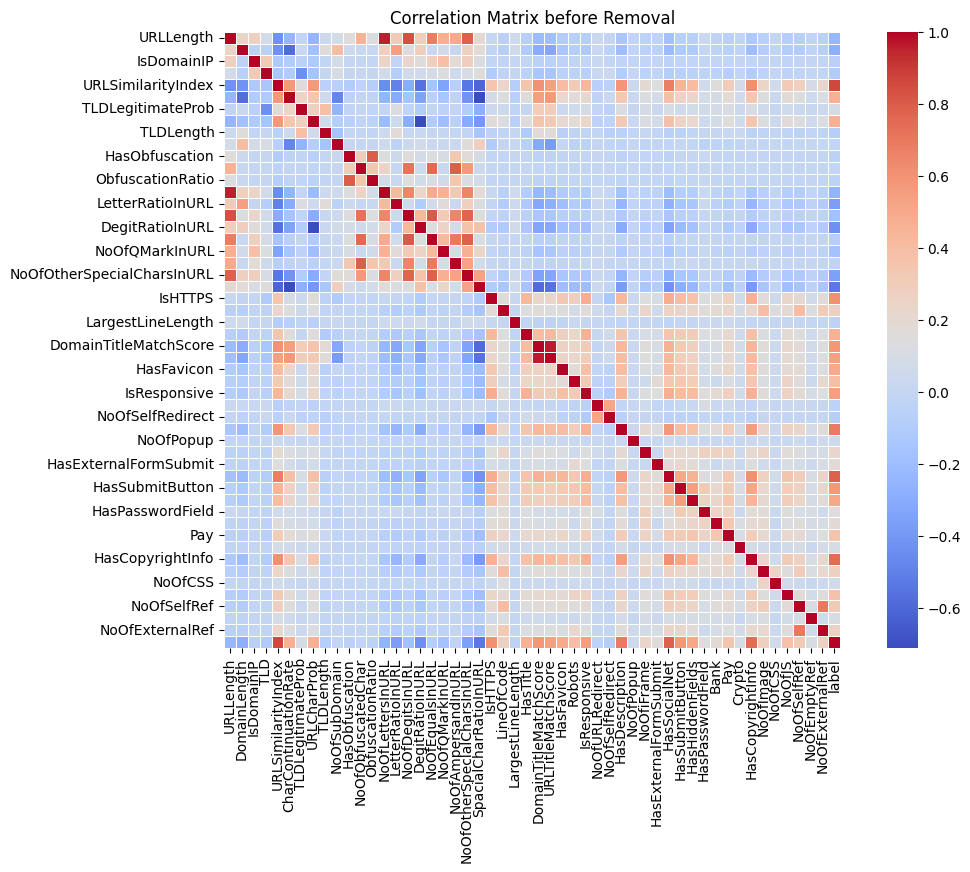

In [ ]:
# Calculate the correlation matrix before removing highly correlated features
correlation_matrix_before = df.corr('pearson')

# Plot the correlation matrix after removal
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_before, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix before Removal')
plt.savefig('Correlation Matrix before Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix before Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is stored in a DataFrame called 'data'
# Iterate over each column in the DataFrame
for col in df.columns:
    contingency_table = pd.crosstab(df[col], df['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()

Chi-square test for URLLength:
Chi-square statistic: 67407.06168244261
P-value: 0.0

Chi-square test for DomainLength:
Chi-square statistic: 36976.8031780716
P-value: 0.0

Chi-square test for IsDomainIP:
Chi-square statistic: 852.260590396482
P-value: 2.3448225852057846e-187

Chi-square test for TLD:
Chi-square statistic: 72412.58849663034
P-value: 0.0

Chi-square test for URLSimilarityIndex:
Chi-square statistic: 232603.227390821
P-value: 0.0

Chi-square test for CharContinuationRate:
Chi-square statistic: 65322.87516163058
P-value: 0.0

Chi-square test for TLDLegitimateProb:
Chi-square statistic: 71998.95018702387
P-value: 0.0

Chi-square test for URLCharProb:
Chi-square statistic: 234441.34570621056
P-value: 3.286006817906975e-25

Chi-square test for TLDLength:
Chi-square statistic: 6820.319022704782
P-value: 0.0

Chi-square test for NoOfSubDomain:
Chi-square statistic: 26713.479728471255
P-value: 0.0

Chi-square test for HasObfuscation:
Chi-square statistic: 646.896659124284
P-valu

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr('pearson')

# Set a threshold for correlation
threshold = 0.7    # value optimal between 0.7 & 0.9

print("Removed features:")

# Find pairs of features with correlation greater than the threshold
correlated_features = set()
for _ in range(4):
    correlation_matrix = df.corr('pearson').abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if i != j and abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                if colname != "label":
                    correlated_features.add(colname)
                    print(colname)
    # Remove highly correlated features
    # Check if the columns exist in the dataframe before dropping them
    existing_columns = [col for col in correlated_features if col in df.columns]
    df = df.drop(columns=existing_columns)

dfd = df
dfknn = df

Removed features:
ObfuscationRatio
NoOfLettersInURL
NoOfDegitsInURL
NoOfDegitsInURL
DegitRatioInURL
NoOfEqualsInURL
NoOfEqualsInURL
NoOfAmpersandInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
SpacialCharRatioInURL
URLTitleMatchScore
NoOfExternalRef


In [ ]:
dfd.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,31,24,0,0,100.0,1.000000,0.522907,0.061933,3,1,...,1,0,0,1,34,20,28,119,0,1
1,23,16,0,1,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,0,1,50,9,8,39,0,1
2,29,22,0,2,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,0,1,10,2,7,42,2,1
3,26,19,0,0,100.0,1.000000,0.522907,0.057606,3,1,...,0,1,1,1,3,27,15,22,1,1
4,33,26,0,3,100.0,1.000000,0.079963,0.059441,3,1,...,1,1,0,1,244,15,34,72,1,1


In [ ]:
dfd.shape

(235795, 42)

In [ ]:
dfd.describe()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,23.278416,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,0.571895
std,41.314153,9.150793,0.051946,53.267103,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,0.494805
min,13.000000,4.000000,0.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,20.000000,0.000000,2.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,1.000000
75%,34.000000,24.000000,0.000000,23.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,1.000000
max,6097.000000,110.000000,1.000000,694.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,1.000000


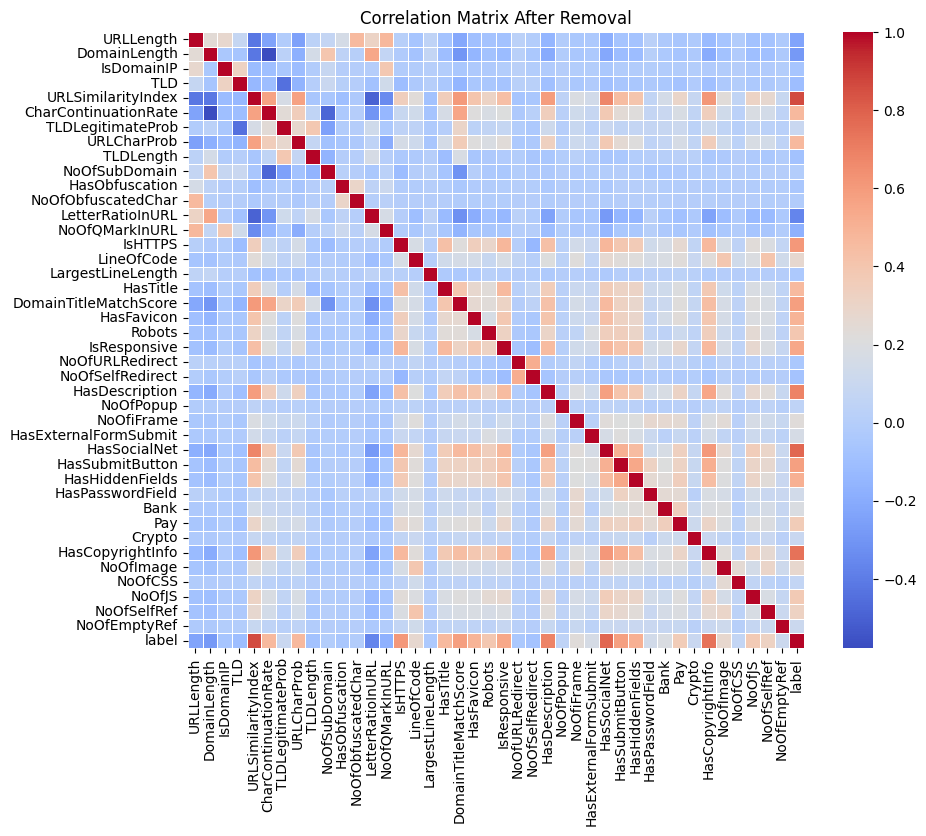

In [ ]:
# Calculate the correlation matrix after removing highly correlated features
correlation_matrix_after = dfd.corr()

# Plot the correlation matrix after removal
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix After Removal')
plt.savefig('Correlation Matrix After Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix After Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()

In [ ]:
X = dfd.drop(columns=['label'])
y = dfd['label']

In [ ]:
X.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef
0,31,24,0,0,100.0,1.000000,0.522907,0.061933,3,1,...,0,1,0,0,1,34,20,28,119,0
1,23,16,0,1,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,0,0,1,50,9,8,39,0
2,29,22,0,2,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,0,0,1,10,2,7,42,2
3,26,19,0,0,100.0,1.000000,0.522907,0.057606,3,1,...,0,0,1,1,1,3,27,15,22,1
4,33,26,0,3,100.0,1.000000,0.079963,0.059441,3,1,...,0,1,1,0,1,244,15,34,72,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating and training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
import pickle
pickle.dump(rf_classifier, open("test.sav", 'wb'))

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=20))

Classification Report:
                      precision    recall  f1-score   support

                   0  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     20124
                   1  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     27035

            accuracy                      1.00000000000000000000     47159
           macro avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159
        weighted avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159



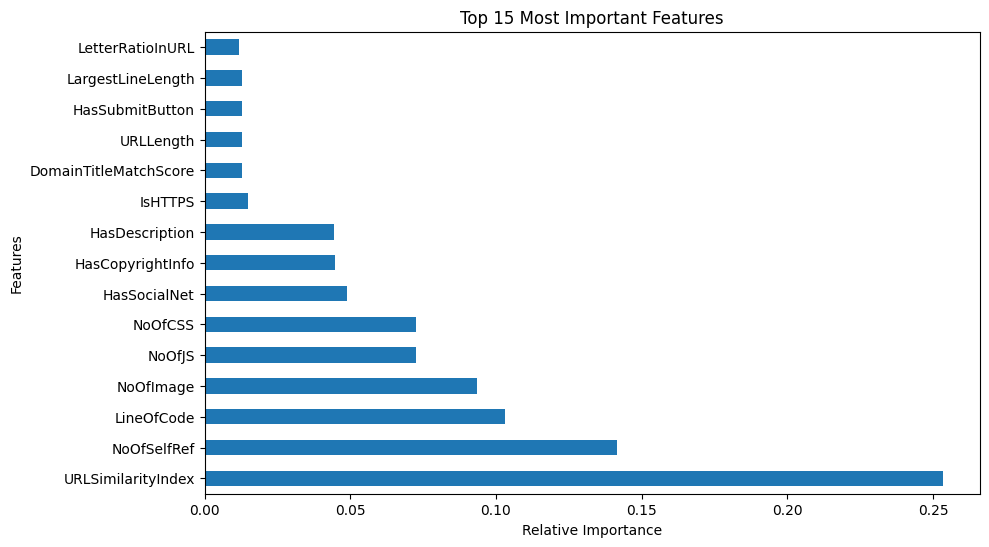

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

KNN Accuracy: 0.9969677049979856
KNN Classification Report:
                      precision    recall  f1-score   support

                   0  0.99830415482068934896 0.99458358179288408607 0.99644039529036920744     20124
                   1  0.99597934341571381367 0.99874237100055485161 0.99735894357743093419     27035

            accuracy                      0.99696770499798559317     47159
           macro avg  0.99714174911820152580 0.99666297639671941333 0.99689966943390007081     47159
        weighted avg  0.99697140229554015445 0.99696770499798559317 0.99696697458468652719     47159



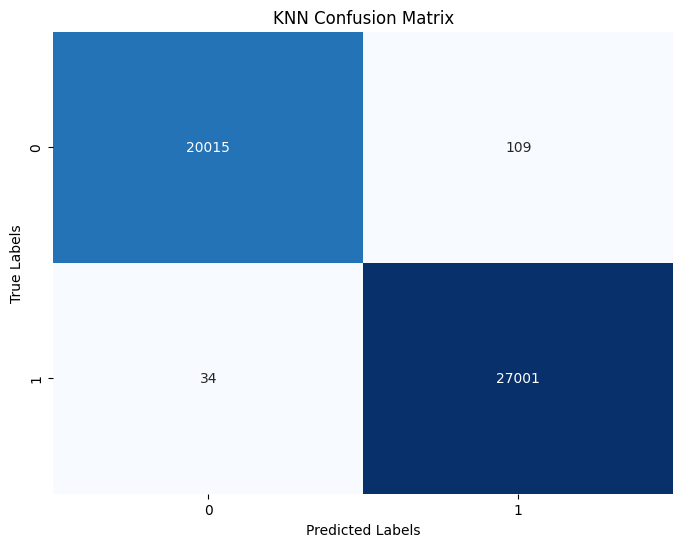

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_knn = knn_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Generate a classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
                      precision    recall  f1-score   support

                   0  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     20124
                   1  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     27035

            accuracy                      1.00000000000000000000     47159
           macro avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159
        weighted avg  1.00000000000000000000 1.00000000000000000000 1.00000000000000000000     47159



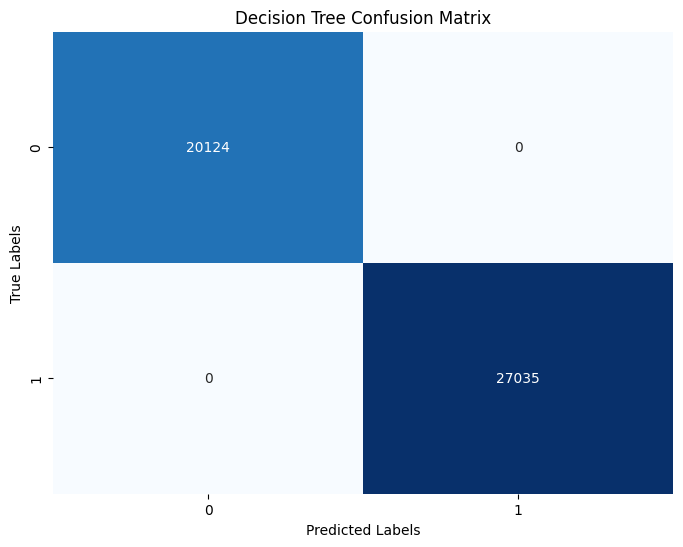

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate a classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

SVM Accuracy: 0.9997879513984606
SVM Classification Report:
                      precision    recall  f1-score   support

                   0  0.99970187816754452204 0.99980123235937190529 0.99975155279503102879     20124
                   1  0.99985203270077316340 0.99977806547068615028 0.99981504771768880957     27035

            accuracy                      0.99978795139846055040     47159
           macro avg  0.99977695543415889823 0.99978964891502908330 0.99978330025635986367     47159
        weighted avg  0.99978795776647233495 0.99978795139846055040 0.99978795274486154110     47159



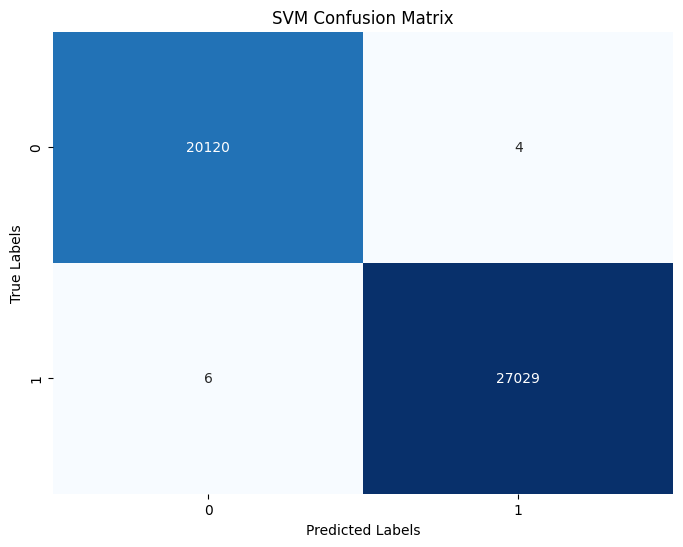

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Generate a classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Naive Bayes Accuracy: 0.9693589770775461
Naive Bayes Classification Report:
                      precision    recall  f1-score   support

                   0  0.93324674119775474779 0.99970184853905785793 0.96533192581751881001     20124
                   1  0.99976564330911643630 0.94677270205289443261 0.97254782757375990432     27035

            accuracy                      0.96935897707754614672     47159
           macro avg  0.96650619225343559204 0.97323727529597614527 0.96893987669563941267     47159
        weighted avg  0.97138025799371441327 0.96935897707754614672 0.96946861030997999453     47159



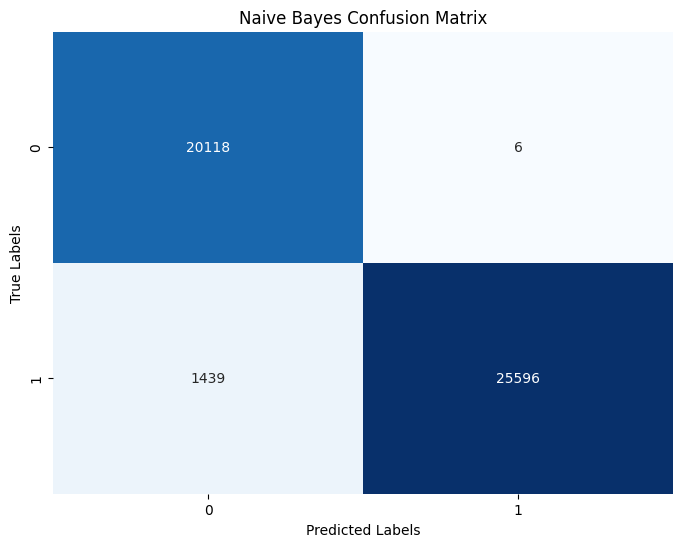

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating and training the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_nb = nb_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Generate a classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, digits=20))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


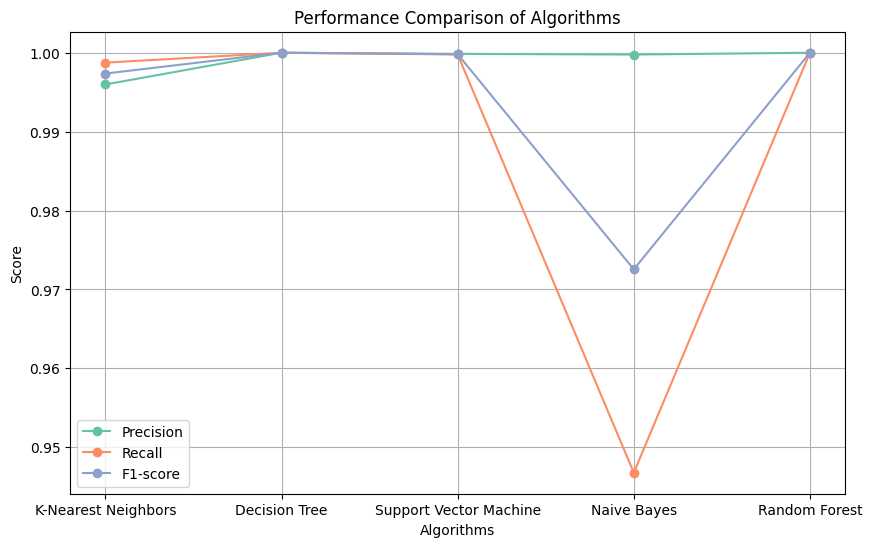

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Define a mapping between abbreviated names and full names
algorithm_names = {
    "KNN": "K-Nearest Neighbors",
    "DT": "Decision Tree",
    "SVM": "Support Vector Machine",
    "NB": "Naive Bayes",
    "Random Forest": "Random Forest"
}

# Calculate precision, recall, and F1-score for each algorithm
metrics = {}
algorithms = ["KNN", "DT", "SVM", "NB", "Random Forest"]

for alg_name in algorithms:
    if alg_name == "Random Forest":
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    else:
        y_pred_alg = locals()[f"y_pred_{alg_name.lower()}"]
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_alg, average='binary')
    metrics[alg_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1_score}

# Define pastel colors
pastel_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Plotting the comparison
plt.figure(figsize=(10, 6))

for i, metric in enumerate(['Precision', 'Recall', 'F1-score']):
    plt.plot([algorithm_names[alg] for alg in algorithms], [metrics[alg][metric] for alg in algorithms], marker='o', label=metric, color=pastel_colors[i % len(pastel_colors)])

plt.title('Performance Comparison of Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.show()